# The Julia set
For a given complex function $f$, the **filled Julia set** is those complex numbers $z$ for which the following sequence remains bounded:<br>
$z,f(z),f(f(z)), f(f(f(z)))), ...$
<br>The boundary of the *filled Julia set* is called the **Julia set**.
<br>In the following, we employ the quadratic function $f(z)=z^2+c$ for visualizing the Julia set.
###### by Hamed Shah-Hosseini
Explanation at: https://www.pinterest.com/HamedShahHosseini/
<br>https://github.com/ostad-ai/Computer-Graphics

In [1]:
# importing the required modules
from matplotlib import pyplot as plt
import numpy as np

The simple implementation of the **filled Julia set**, which is kind of slow:

In [2]:
# filled Julia set: straightforward (slow) implementation
def f(z,c):
    return z**2+c

def juliaset(rows=512,cols=512,c=-.1+.65j,max_iter=500):
    max_val=max(2,abs(c))
    image=255*max_iter*np.ones((rows,cols),dtype=np.int32)
    xmin,xmax,ymin,ymax=-1.25,1.25,-1.1,1.1
    for row in range(rows):
        for col in range(cols):
            x=xmin+col*(xmax-xmin)/(cols-1)
            y=ymin+row*(ymax-ymin)/(rows-1)
            z=complex(x,y); 
            for iter in range(max_iter):
                z=f(z,c)
                if abs(z)>max_val:
                    image[row,col]=255*iter
                    break                    
    image=(image/max_iter).astype('int')
    return image

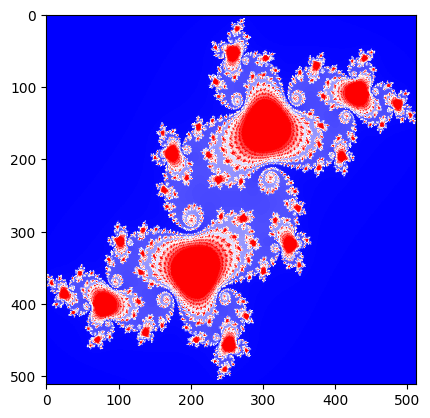

In [3]:
image=juliaset()
plt.imshow(image,cmap=plt.cm.bwr)
plt.show()

The numpy-based implementation of the **filled Julia set**, which is quite fast:

In [4]:
# filled Julia set: Numpy-based (fast) implementation
# This is faster than the straight version
def juliaset_np(rows=512,cols=512, c=-.1+.65j,max_iter=500): 
    max_val=max(2,abs(c))
    x, y = np.meshgrid(np.linspace(-1.25,1.25, cols),
                       np.linspace(-1.1, 1.1, rows))
    z = x + 1j * y
    image = 255*max_iter*np.ones(z.shape,dtype=np.int32)
    for iter in range(max_iter):
        indices = (image == 255*max_iter)
        z[indices] = z[indices]**2 + c
        image[indices & (np.abs(z) > max_val)] = 255*iter
    image=(image/max_iter).astype('int')
    return image

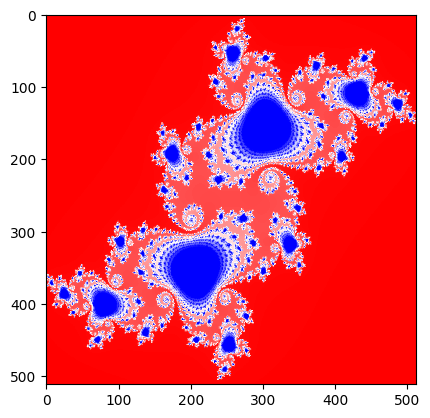

In [5]:
image2=juliaset_np()
plt.imshow(image2,cmap=plt.cm.bwr_r)
plt.show()